## Objective

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
# load the cookie_cats data
df = pd.read_csv('cookie_cats.csv')

In [4]:
df_copy = df.copy()
df_copy.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [5]:
# exploring dataset

# check if all the userid are unique
print(len(df_copy))
print(len(df_copy['userid'].unique()))

90189
90189


every userid is unique

In [6]:
# check if any column has NaN values
for col in df_copy.columns:
    print(f"Number of NaN values in {col}: {df_copy[col].isna().sum()}")

Number of NaN values in userid: 0
Number of NaN values in version: 0
Number of NaN values in sum_gamerounds: 0
Number of NaN values in retention_1: 0
Number of NaN values in retention_7: 0


There's no NaN value in the whole dataset, now we can proceed describing the distribution of each feature

In [7]:
# check the number of unique values in each feature
for col in df_copy.columns:
    print(f"Number of unique values in {col}: {len(df_copy[col].unique())}")

Number of unique values in userid: 90189
Number of unique values in version: 2
Number of unique values in sum_gamerounds: 942
Number of unique values in retention_1: 2
Number of unique values in retention_7: 2


so version column is binary, sum_gamerounds column is categorical, retention_1 and retention_7 columns are binary as well

In [10]:
# explore the distribution of features that are categorical

# sum_gamerounds
df_copy.describe([.25, .5, .75])[["sum_gamerounds"]]

,sum_gamerounds
count,90189.000000
mean,51.872457
std,195.050858
min,0.000000
25%,5.000000
50%,16.000000
75%,51.000000
max,49854.000000


In [11]:
df_copy.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17.0,52.456264,256.716423,49854
gate_40,45489,16.0,51.298776,103.294416,2640


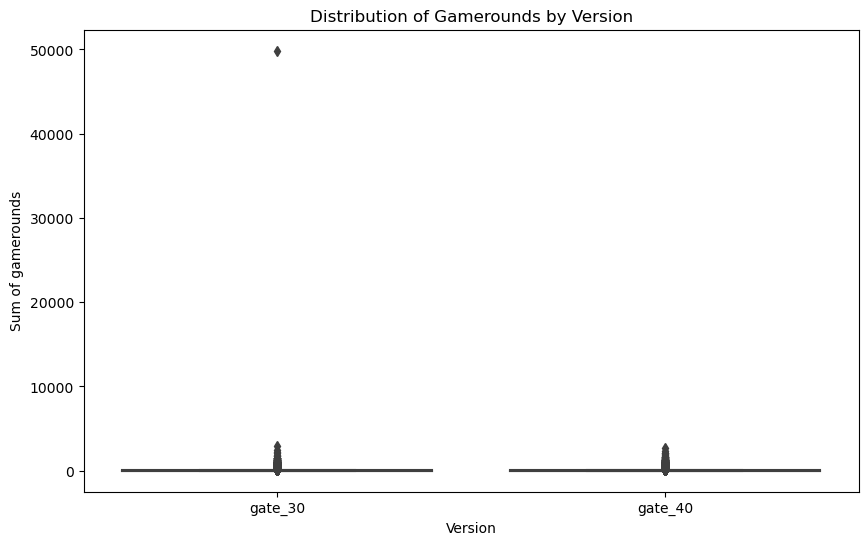

In [12]:
# box plot for the distribution of number of gamerounds for each gate level
plt.figure(figsize=(10, 6))
sns.boxplot(x='version', y='sum_gamerounds', data=df_copy)
plt.title('Distribution of Gamerounds by Version')
plt.ylabel('Sum of gamerounds')
plt.xlabel('Version')
plt.show()

There's an extreme outlier in the number of gamerounds for gate 30